In [1]:
!pip install --upgrade seaborn==0.10.1
!pip install --upgrade scikit-learn==0.23.1
!pip install --upgrade matplotlib==3.2.0
!pip install --upgrade pandas==1.0.4
!pip install --upgrade qiskit==0.19.6 
!pip install --upgrade plotly==4.9.0

from IPython.display import clear_output
clear_output()

In [2]:
from qiskit import *
from qiskit.compiler import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import numpy as np
from IPython.display import display, Math, Latex
%matplotlib inline

In [3]:
def even_block(circuit, theta):
    
    circuit.rz(theta, range(4))
    
    for i in range(4):
        for j in range(i+1, 4):
            circuit.cz(i, j)
    
    return circuit

def odd_block(circuit, theta):
    
    circuit.rx(theta, range(4))
    
    return circuit

def single_layer(circuit, theta1, theta2):
    
    circuit = odd_block(circuit, theta2)
    circuit = even_block(circuit, theta1)
    circuit.barrier()
    
    return circuit

In [4]:
def network(circuit, L, theta):
    
    for i in range(L):
        circuit = single_layer(circuit, theta[2*i], theta[2*i + 1])
    
    return circuit

In [5]:
from qiskit.quantum_info import random_statevector
from qiskit import execute, Aer

def give_vector(circuit):
    
    backend = Aer.get_backend("statevector_simulator")
    job = execute(circuit ,backend = backend)
    statevector1 = job.result().get_statevector()
    
    return statevector1

In [6]:
def cost(actual, prediction):
    
    ans1 = actual.data - prediction.data
    a1 = np.array(ans1)
    a2 = np.conj(a1)
    return float(a2.dot(a1))

In [7]:
def give_output(theta, L):
    
    circuit = QuantumCircuit(4)
    circuit = network(circuit, L, theta)
    predictions = give_vector(circuit)
    
    return predictions

In [8]:
epsilon = 0.0000000001

def gradient(theta, L, phi):
    
    grad = []
    for i in range(len(theta)):
        initial = theta[i]
        
        theta[i] = initial + epsilon
        pred = give_output(theta, L)
        diff1 = cost(phi, pred)
        
        theta[i] = initial - epsilon
        pred = give_output(theta, L)
        diff2 = cost(phi, pred)
        
        theta[i] = initial
        grady = (diff1 - diff2)/(2*epsilon)
        grad.append(float(grady))
        
    return grad

In [9]:
learning_rate = 0.03

def backprop(theta, num, L, phi):
    curve = []
    maxiter = 0
    
    for i in range(num):
        maxiter = i  
        grad = gradient(theta, L, phi)
        for index in range(len(theta)):
            theta[index] = theta[index] - learning_rate*grad[index] 
            
        final = give_output(theta, L)
        value = cost(final, phi)
        print("cost after " + str(i) + "th iteration is " + str(value))
        curve.append(value)
        
        if i > 10 and curve[i] < value and curve[i-1] < curve[i]:
            break  
        
    return theta , curve, value, maxiter

In [10]:
def parameter_intialisation(L):
    np.random.seed(45)
    return np.random.rand(2*L)*2*np.pi

In [16]:
L = 4 # running one sample iteration of all for L = 4

In [12]:
theta = parameter_intialisation(L)

In [13]:
phi = random_statevector(16, 69)
num = 150
print()
thet, curve, value, numiter = backprop(theta, num, L, phi)

<ipython-input-6-3c9697cdd9d5>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(a2.dot(a1))


cost after 0th iteration is 1.5734552815361864
cost after 1th iteration is 1.5259684476389817
cost after 2th iteration is 1.5045719709433683
cost after 3th iteration is 1.4917907090398275
cost after 4th iteration is 1.4818888632338303
cost after 5th iteration is 1.473197413935584
cost after 6th iteration is 1.4652359918029065
cost after 7th iteration is 1.4578489125556413
cost after 8th iteration is 1.4509653429071203
cost after 9th iteration is 1.444535016782909
cost after 10th iteration is 1.4385122543355462
cost after 11th iteration is 1.4328523754973919
cost after 12th iteration is 1.4275109634542873
cost after 13th iteration is 1.4224443237325035
cost after 14th iteration is 1.417609566904058
cost after 15th iteration is 1.4129648048025167
cost after 16th iteration is 1.408469545565378
cost after 17th iteration is 1.4040845498416448
cost after 18th iteration is 1.3997718963562185
cost after 19th iteration is 1.3954950169885727
cost after 20th iteration is 1.3912187089712456
cost a

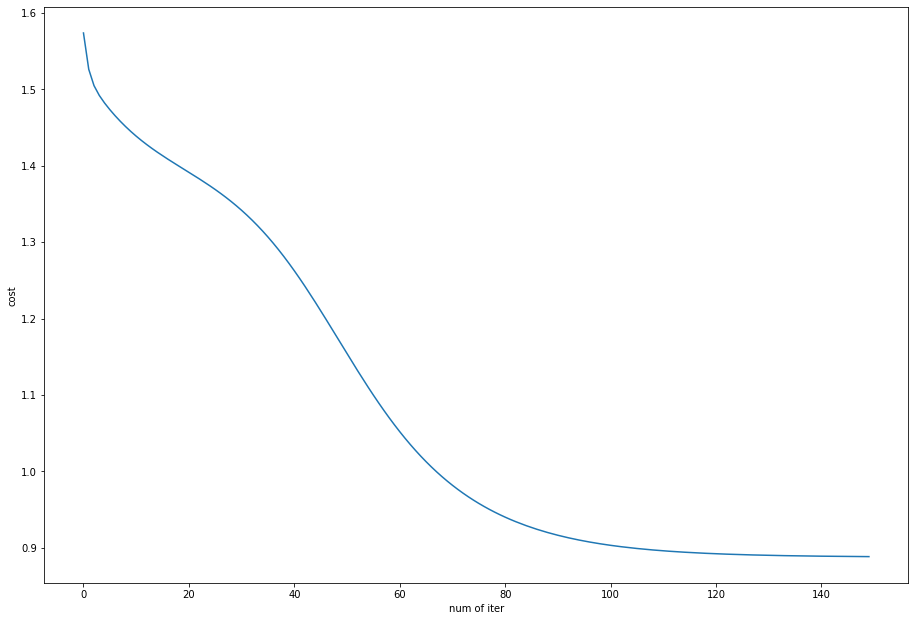

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
axis = fig.add_axes([0.0, 0.0, 2, 2])
axis.plot(range(numiter + 1), curve)
axis.set_ylabel("cost")
axis.set_xlabel("num of iter")
plt.show()

In [17]:
lister = range(1, 11)
final_cost = []
thet = []
curve = []
numit = []
num = 150
phi = random_statevector(16, 69)
for i in range(len(lister)):
    print("for the " + str(i) + "th iteration of L")
    l = lister[i]
    theta = parameter_intialisation(l)
    theta1, c1, cost1, numiter = backprop(theta, num, l, phi)
    thet.append(theta1)
    curve.append(c1)
    final_cost.append(cost1)
    numit.append(numiter)

for the 0th iteration of L
cost after 0th iteration is 2.070740381771001
cost after 1th iteration is 2.0649991059463417
cost after 2th iteration is 2.0589956306502613
cost after 3th iteration is 2.052693551650241
cost after 4th iteration is 2.046058064785942
cost after 5th iteration is 2.0390566212319996
cost after 6th iteration is 2.031660062695199
cost after 7th iteration is 2.023843469587498


<ipython-input-6-3c9697cdd9d5>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(a2.dot(a1))


cost after 8th iteration is 2.01558712600322
cost after 9th iteration is 2.0068779533748824
cost after 10th iteration is 1.9977099824223836
cost after 11th iteration is 1.9880857608613782
cost after 12th iteration is 1.9780163936571895
cost after 13th iteration is 1.9675223983183883
cost after 14th iteration is 1.956633426676311
cost after 15th iteration is 1.945387777020943
cost after 16th iteration is 1.933831693477767
cost after 17th iteration is 1.9220181644324565
cost after 18th iteration is 1.910005216833372
cost after 19th iteration is 1.8978543070454057
cost after 20th iteration is 1.8856280034434656
cost after 21th iteration is 1.873388201638923
cost after 22th iteration is 1.8611944160408043
cost after 23th iteration is 1.8491017895578168
cost after 24th iteration is 1.8371600185838468
cost after 25th iteration is 1.8254123956772736
cost after 26th iteration is 1.813895233500514
cost after 27th iteration is 1.8026373776540212
cost after 28th iteration is 1.7916609969256996
co

cost after 29th iteration is 1.6459461814440792
cost after 30th iteration is 1.6388941442638427
cost after 31th iteration is 1.631929629252466
cost after 32th iteration is 1.625067676088424
cost after 33th iteration is 1.6183211386310365
cost after 34th iteration is 1.6117009770224136
cost after 35th iteration is 1.6052162706440414
cost after 36th iteration is 1.5988743731536046
cost after 37th iteration is 1.592681110315762
cost after 38th iteration is 1.5866408109582029
cost after 39th iteration is 1.5807565193782696
cost after 40th iteration is 1.5750302643190477
cost after 41th iteration is 1.5694630718591662
cost after 42th iteration is 1.5640551233768512
cost after 43th iteration is 1.558805996405304
cost after 44th iteration is 1.5537145419776355
cost after 45th iteration is 1.548779262797755
cost after 46th iteration is 1.5439982652234454
cost after 47th iteration is 1.539369344038945
cost after 48th iteration is 1.5348899821692994
cost after 49th iteration is 1.530557626887643

cost after 52th iteration is 1.02538098103485
cost after 53th iteration is 1.0226945498619933
cost after 54th iteration is 1.0200593589663338
cost after 55th iteration is 1.017473045175254
cost after 56th iteration is 1.0149336702137228
cost after 57th iteration is 1.0124396493365801
cost after 58th iteration is 1.0099897419128667
cost after 59th iteration is 1.0075829683578872
cost after 60th iteration is 1.0052186199259046
cost after 61th iteration is 1.00289621289175
cost after 62th iteration is 1.0006154423254205
cost after 63th iteration is 0.9983761970928702
cost after 64th iteration is 0.9961784787250448
cost after 65th iteration is 0.9940224159498883
cost after 66th iteration is 0.9919082676389613
cost after 67th iteration is 0.9898363566701123
cost after 68th iteration is 0.9878070384299721
cost after 69th iteration is 0.9858207677773334
cost after 70th iteration is 0.9838779334530894
cost after 71th iteration is 0.9819789963047594
cost after 72th iteration is 0.98012434765504

cost after 73th iteration is 0.9668919748279783
cost after 74th iteration is 0.9624171631952321
cost after 75th iteration is 0.9581816684187029
cost after 76th iteration is 0.9541740819441245
cost after 77th iteration is 0.9503832544961703
cost after 78th iteration is 0.9467984707354783
cost after 79th iteration is 0.9434094845546712
cost after 80th iteration is 0.9402063966297709
cost after 81th iteration is 0.9371797057216048
cost after 82th iteration is 0.9343204691351663
cost after 83th iteration is 0.9316200441996958
cost after 84th iteration is 0.9290701843286608
cost after 85th iteration is 0.926663086665549
cost after 86th iteration is 0.9243913144751432
cost after 87th iteration is 0.9222477278038297
cost after 88th iteration is 0.920225605672852
cost after 89th iteration is 0.9183184522655659
cost after 90th iteration is 0.9165202182682036
cost after 91th iteration is 0.9148250133123172
cost after 92th iteration is 0.9132273403447887
cost after 93th iteration is 0.91172186442

cost after 93th iteration is 0.9275342636163678
cost after 94th iteration is 0.9274696072556073
cost after 95th iteration is 0.9274054323226397
cost after 96th iteration is 0.9273416988717756
cost after 97th iteration is 0.9272783774058966
cost after 98th iteration is 0.9272154405163224
cost after 99th iteration is 0.9271528611108364
cost after 100th iteration is 0.927090613821361
cost after 101th iteration is 0.9270286801852907
cost after 102th iteration is 0.9269670340851831
cost after 103th iteration is 0.9269056539108922
cost after 104th iteration is 0.9268445229569525
cost after 105th iteration is 0.926783621252943
cost after 106th iteration is 0.9267229328230093
cost after 107th iteration is 0.9266624450905382
cost after 108th iteration is 0.9266021389476695
cost after 109th iteration is 0.9265420066879578
cost after 110th iteration is 0.9264820299105463
cost after 111th iteration is 0.9264221976865239
cost after 112th iteration is 0.9263625011694478
cost after 113th iteration is

cost after 113th iteration is 0.9020560119204218
cost after 114th iteration is 0.9018723834898151
cost after 115th iteration is 0.9016928426700658
cost after 116th iteration is 0.9015171980325778
cost after 117th iteration is 0.9013452765532793
cost after 118th iteration is 0.9011769093436464
cost after 119th iteration is 0.9010119436431859
cost after 120th iteration is 0.9008502410986979
cost after 121th iteration is 0.9006916641880902
cost after 122th iteration is 0.9005360906846793
cost after 123th iteration is 0.90038340382226
cost after 124th iteration is 0.9002334896372096
cost after 125th iteration is 0.9000862499384152
cost after 126th iteration is 0.8999415864837779
cost after 127th iteration is 0.8997994077098646
cost after 128th iteration is 0.8996596343665246
cost after 129th iteration is 0.8995221776641453
cost after 130th iteration is 0.8993869703692869
cost after 131th iteration is 0.8992539336710225
cost after 132th iteration is 0.8991230093207162
cost after 133th itera

cost after 133th iteration is 0.8866277262169474
cost after 134th iteration is 0.8866029485021617
cost after 135th iteration is 0.8865790188672283
cost after 136th iteration is 0.8865559017600607
cost after 137th iteration is 0.8865335686931695
cost after 138th iteration is 0.886511986840156
cost after 139th iteration is 0.8864911230224473
cost after 140th iteration is 0.8864709534154451
cost after 141th iteration is 0.8864514501450418
cost after 142th iteration is 0.8864325885859002
cost after 143th iteration is 0.8864143439648229
cost after 144th iteration is 0.8863966903519899
cost after 145th iteration is 0.8863796096409926
cost after 146th iteration is 0.8863630784266628
cost after 147th iteration is 0.8863470774787564
cost after 148th iteration is 0.8863315830252027
cost after 149th iteration is 0.8863165784687858
for the 7th iteration of L
cost after 0th iteration is 2.455695911800442
cost after 1th iteration is 2.402338804822525
cost after 2th iteration is 2.3329034665041766
co

cost after 2th iteration is 1.133720369376852
cost after 3th iteration is 1.1024334952193557
cost after 4th iteration is 1.075494022048769
cost after 5th iteration is 1.0524344080434984
cost after 6th iteration is 1.032803272928613
cost after 7th iteration is 1.0161617904584985
cost after 8th iteration is 1.0020869367737273
cost after 9th iteration is 0.9901908184267445
cost after 10th iteration is 0.9801269589765538
cost after 11th iteration is 0.9715942097966478
cost after 12th iteration is 0.9643353684796816
cost after 13th iteration is 0.9581341845654295
cost after 14th iteration is 0.9528106595086097
cost after 15th iteration is 0.9482162426388389
cost after 16th iteration is 0.9442287994804769
cost after 17th iteration is 0.9407483571035
cost after 18th iteration is 0.9376931241191848
cost after 19th iteration is 0.9349961312555739
cost after 20th iteration is 0.9326024957480292
cost after 21th iteration is 0.9304670149332339
cost after 22th iteration is 0.9285523892694463
cost a

cost after 22th iteration is 0.9135800767588976
cost after 23th iteration is 0.9114161443284574
cost after 24th iteration is 0.9095635182609998
cost after 25th iteration is 0.9079647725300123
cost after 26th iteration is 0.9065734406022781
cost after 27th iteration is 0.9053519508385444
cost after 28th iteration is 0.9042699452077044
cost after 29th iteration is 0.9033029544594956
cost after 30th iteration is 0.9024312169479091
cost after 31th iteration is 0.9016388370621641
cost after 32th iteration is 0.9009129628498525
cost after 33th iteration is 0.9002432710394515
cost after 34th iteration is 0.8996213916968667
cost after 35th iteration is 0.8990405752179058
cost after 36th iteration is 0.898495315364898
cost after 37th iteration is 0.8979811566989124
cost after 38th iteration is 0.8974944834527856
cost after 39th iteration is 0.8970323008194215
cost after 40th iteration is 0.8965921665597922
cost after 41th iteration is 0.8961720215371186
cost after 42th iteration is 0.8957701942

TypeError: 'range' object cannot be interpreted as an integer

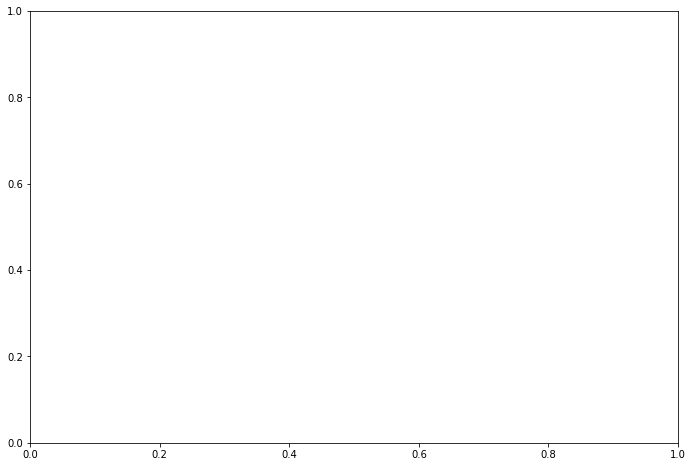

In [18]:
fig = plt.figure()
axis = fig.add_axes([0.0, 0.0, 1.5, 1.5])
axis.plot(range(), final_cost)
axis.set_ylabel("cost")
axis.set_xlabel("num of iter")
plt.show()